## PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/DataPCA.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


**Checking for missing data from dataset:**

In [3]:
null_val = df.isnull().sum()
null_val

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

the Dataset has No mising Data

**Checking for duplicate data from dataset:**

In [5]:
df[df.duplicated()]

,x1,x2,x3,x4,x5,x6,x7


All Values are unique in the data

**Statistics of Data**

In [6]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


**Visualizing the dataset**

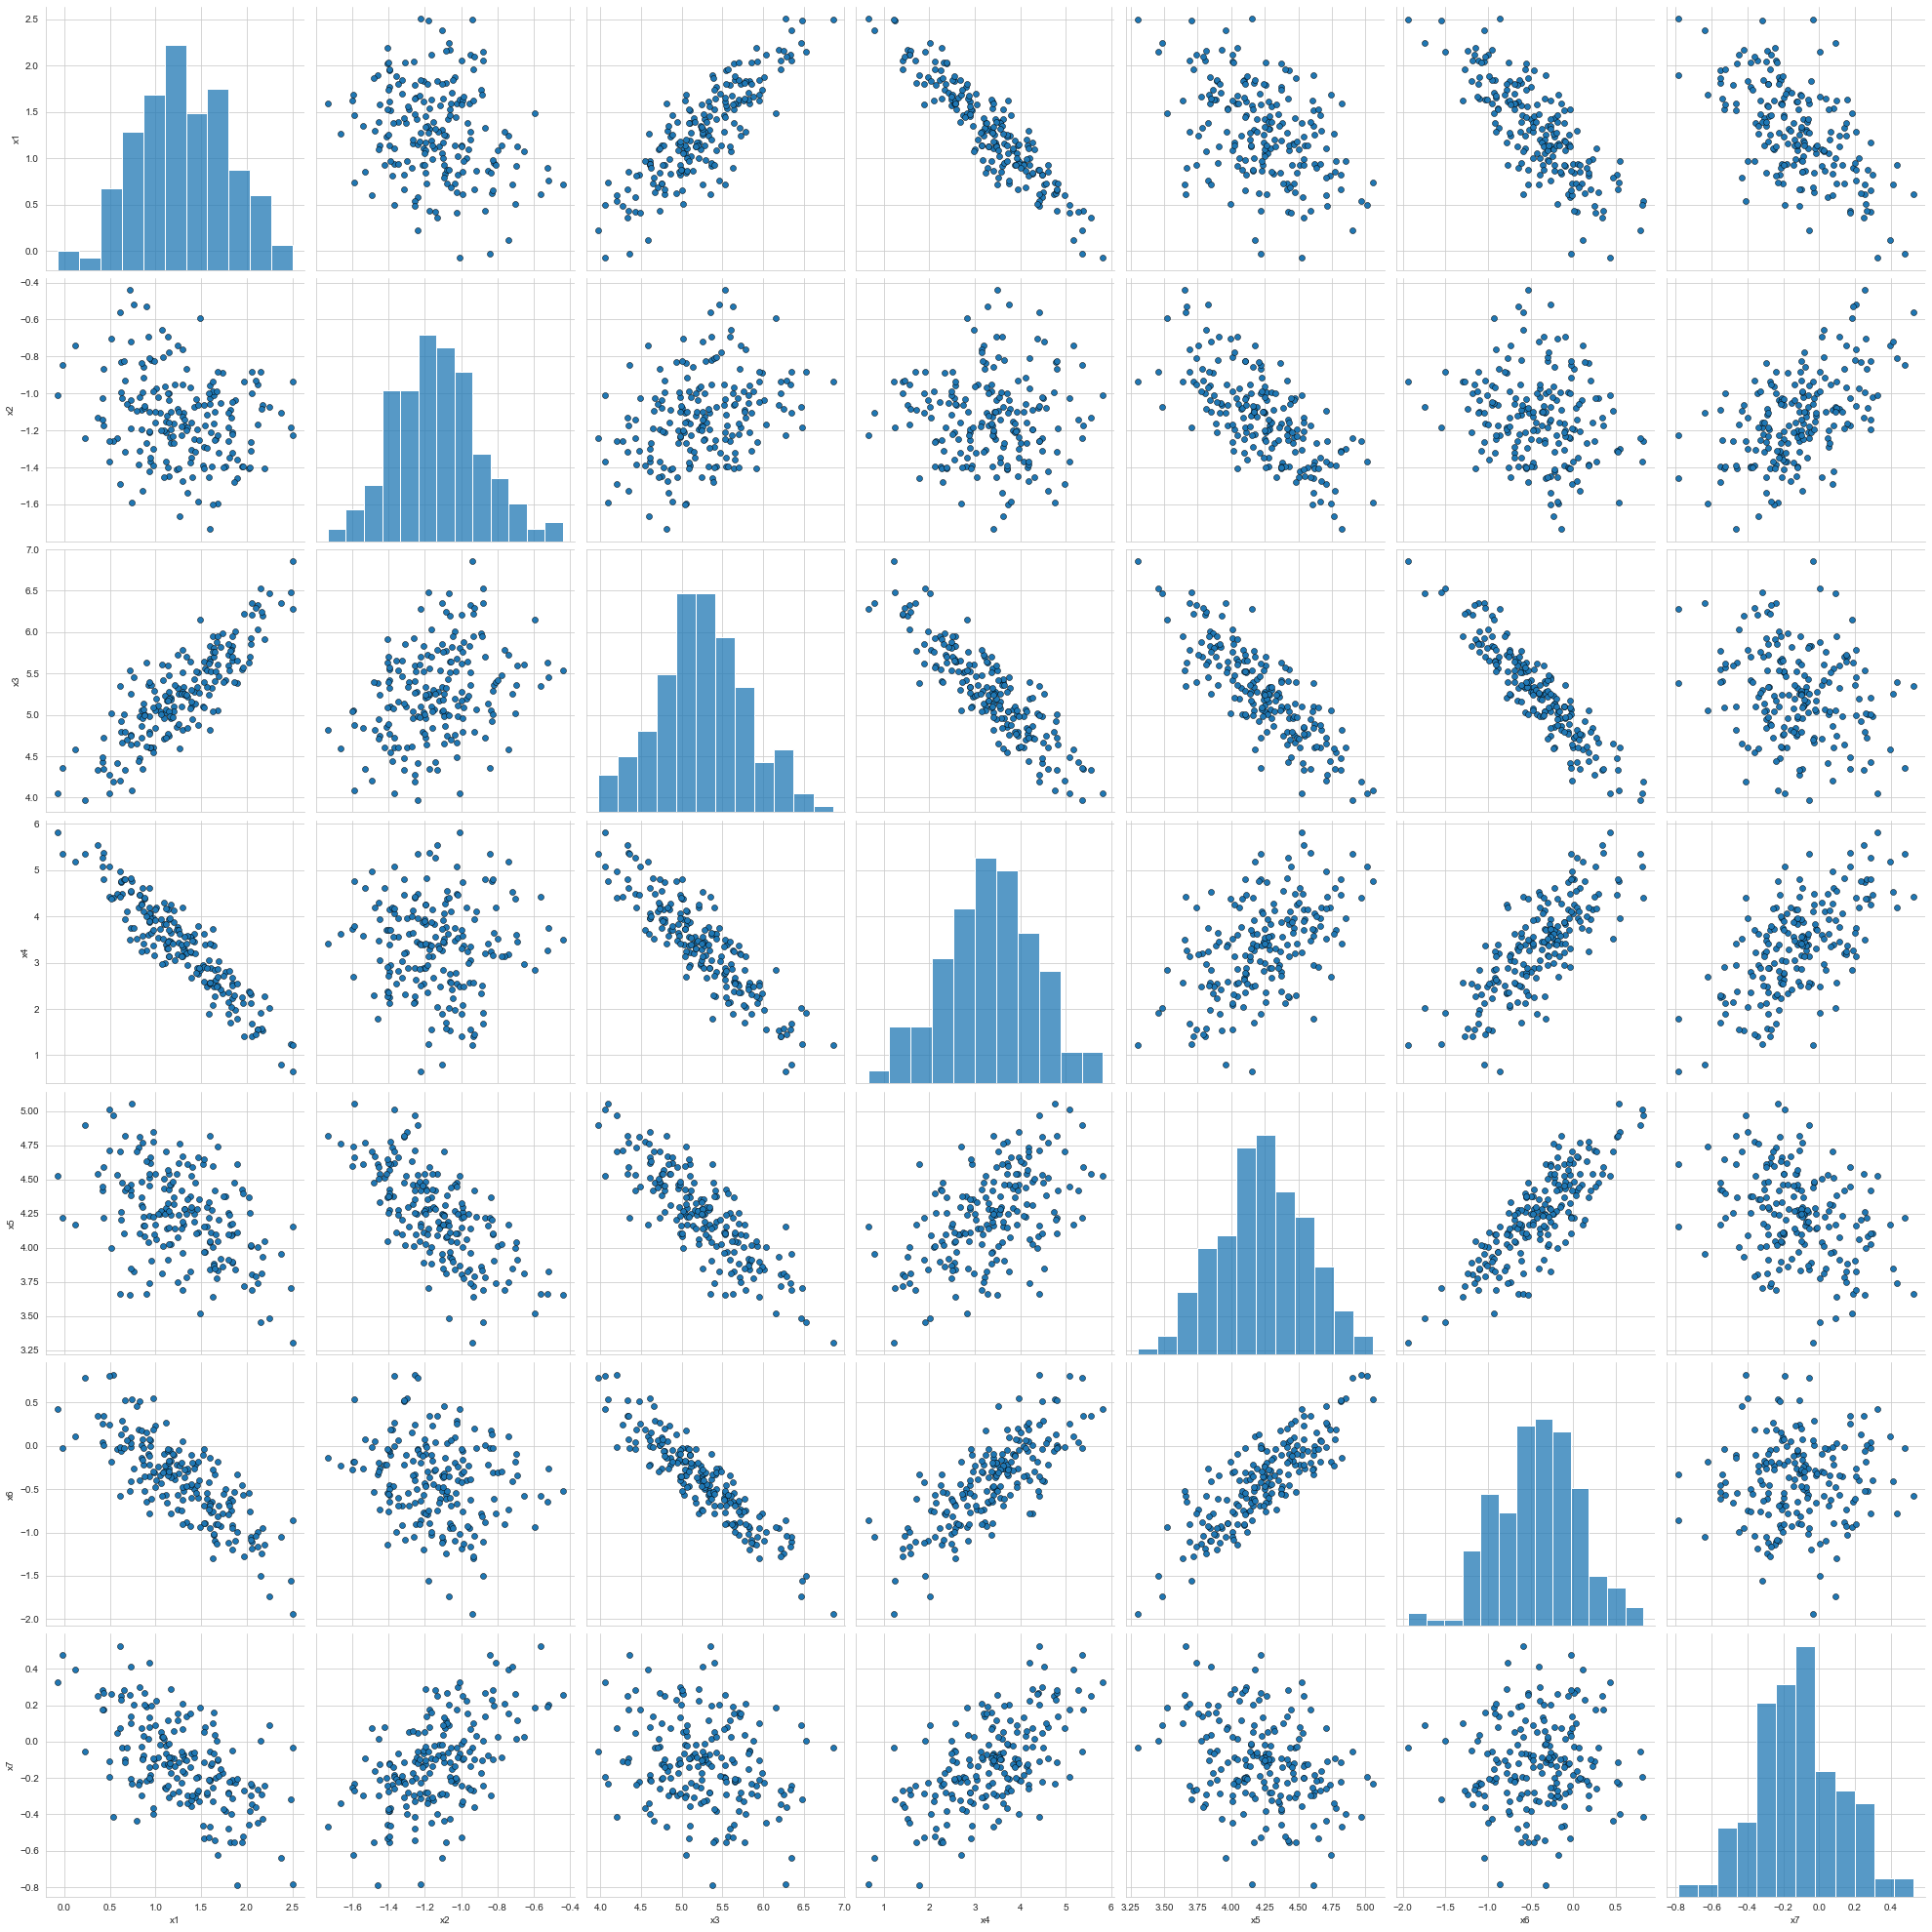

In [7]:
sns.set_style("whitegrid");
sns.pairplot(df, size=4, diag_kind = 'auto',plot_kws = {'edgecolor': 'k'});
plt.show()

**Observation:**
1. Maximum of Data are linear to each other or linaerly separable.

In [7]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns = df.columns)

# statistics of scaled data
df_scaled.describe()

,x1,x2,x3,x4,x5,x6,x7
count,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02
mean,-1.519253e-17,-4.423362e-16,9.664784e-16,4.131198e-16,-2.186701e-15,1.408230e-16,1.177421e-16
std,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00,1.002642e+00
min,-2.681699e+00,-2.565362e+00,-2.350181e+00,-2.711687e+00,-2.832879e+00,-3.169225e+00,-2.792006e+00
25%,-7.063108e-01,-6.968414e-01,-6.775764e-01,-7.023327e-01,-6.510581e-01,-6.834685e-01,-6.656180e-01
50%,-3.076318e-02,-4.300486e-02,-9.747732e-03,5.874870e-02,2.534350e-02,7.274151e-02,-1.586079e-02
75%,6.918035e-01,5.929503e-01,6.765831e-01,6.586803e-01,7.001440e-01,6.583283e-01,6.526457e-01
max,2.400735e+00,2.978622e+00,2.925970e+00,2.492669e+00,2.511689e+00,2.570934e+00,2.701991e+00


### We will use PCA to reduce dimension of Data and check Variation explained by Number of Dimension

In [8]:
from sklearn.decomposition import PCA

**Training the model**

Text(0, 0.5, 'cumulative explained variance')

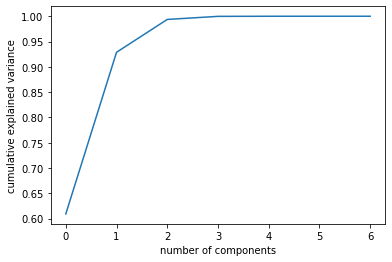

In [12]:
pca = PCA().fit(df_scaled.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

**Obsevation:**
1. We can see that more than 90% of variation can be explained by 2 components
2. So we will choose optimum number of components that is 2.

In [13]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled.values)
pca_df = pd.DataFrame(pca_data, columns=("Dimension-1","Dimension-2",))

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.60927057 0.31946097]


In [14]:
pca_df.head()

,Dimension-1,Dimension-2
0,-1.597024,0.826766
1,-0.044709,-0.326855
2,1.059892,0.742775
3,-3.889508,1.214780
4,1.268405,-0.523475


### Reconstruction Loss

In [19]:
X_train = df

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
from sklearn.metrics import mean_squared_error
MSE = []
components = [2,3,4,5,6]    
for n in components:
    pca = PCA(n_components=n)
    reconstructed = pca.inverse_transform(pca.fit_transform(df_scaled.values))
    mse = mean_squared_error(X_train.values, reconstructed,squared=True)
    MSE.append(mse)
    print("MSE: {} with {} components".format(mse, n))

MSE: 8.864601813547573 with 2 components
MSE: 8.883381368481924 with 3 components
MSE: 8.882440121304105 with 4 components
MSE: 8.882423442189006 with 5 components
MSE: 8.882423008386276 with 6 components


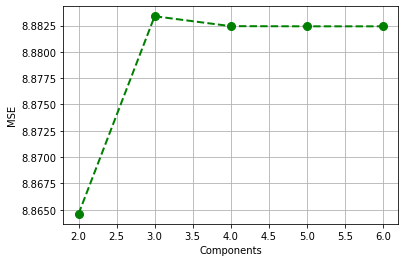

In [22]:
plt.plot(components, MSE, 'go--', linewidth=2, markersize=8)
plt.xlabel("Components")
plt.ylabel("MSE")
plt.grid()
plt.show()

**Observation:**
1. We can see that for 2 dimension MSE losss is mininmum
2. As the dimension increases loss also increases
3. For three component loss is maximum.

**Refrences:**
1. https://stackoverflow.com/questions/36566844/pca-projection-and-reconstruction-in-scikit-learn
2. https://towardsdatascience.com/explain-feature-variation-employing-pca-in-scikit-learn-6711e0a5c0b7